# Udacity Project 2: Wrangle and Analyze Data ([@dog_rates](https://twitter.com/dog_rates))
##### by Ibrahim Badr
## Introduction
Real-world data rarely come clean and our job as data analysts is to clean it in order to start making valuable insights on such data, this will be done through a process called (Data Wrangling).

Data Wrangling: is the process of Gathering data, Assessing its quality, and Cleaning the data before using it in any analysis or visualization.

### Project Summary
#### Data Wrangling Process:
- [Gathering data](#Gathering)
- [Assessing data](#Assessing)
- [Cleaning data](#Cleaning)


#### Findings and Insights:
- [Storing, analyzing, and visualizing wrangled data](#Storing)
- [Reporting on 1) data wrangling efforts and 2) data analyses and visualizations](#Reporting)

###### Importing the packages

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import re
import time
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

<a id='Gathering'></a>
### Gathering Data

In [2]:
# Read Twitter Archive CSV file: 
twitter_arc_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arc_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# Image predictions downloaded programmatically tSV file:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)
    
# Load image predictions file:
image_pred_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
# Query twitter API for each tweet's JSON data using tweepy:

consumer_key = '4zwW4WoEL3GCxXAwbt6dQQJj9'
consumer_secret = 'v1ofOofT475BwzY0T8IzkK60ua8Hhj4GLnAzkMryHA60eXBqiC'
access_token = '1281288041064206341-Pqy7YHx7AtlnbWpVwp8c2SfbDI8jBv'
access_secret = 'OtnfwYFgvGVJM5XO7DAvn80jyfeOWeeP9I3CX44OBXWDQ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# Store Twitter API data

errors = []

start = time.time()

if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as file:
        for tweet_id in twitter_arc_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)


end = time.time()
print(end - start)

0.0007066726684570312


In [8]:
# Load Twitter API data:

list_df = []

with open('tweet_json.txt', 'r', encoding='utf8') as file:
    for line in file:
        tweet_line = json.loads(line)
        list_df.append({'tweet_id': tweet_line['id'],
                        'favorites': tweet_line['favorite_count'],
                        'retweets': tweet_line['retweet_count']})
        
api_df = pd.DataFrame(list_df)
api_df.head()

,favorites,retweets,tweet_id
0,35947,7643,892420643555336193
1,31032,5648,892177421306343426
2,23346,3745,891815181378084864
3,39251,7811,891689557279858688
4,37494,8405,891327558926688256


<a id='Assessing'></a>
### Assessing Data

###### Using Visual and Programmatic Assessment to check for quality and tidiness issues:

In [9]:
twitter_arc_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
twitter_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_arc_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_arc_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
twitter_arc_df['tweet_id'].duplicated().sum()

0

In [14]:
twitter_arc_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
twitter_arc_df['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [16]:
twitter_arc_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
twitter_arc_df.loc[(twitter_arc_df.name.str.islower())].name.value_counts().index

Index(['a', 'the', 'an', 'very', 'one', 'just', 'quite', 'not', 'actually',
       'mad', 'getting', 'all', 'light', 'officially', 'incredibly', 'his',
       'space', 'old', 'unacceptable', 'my', 'by', 'infuriating', 'life',
       'such', 'this'],
      dtype='object')

In [18]:
image_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
image_pred_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1818,834167344700198914,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1,ox,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False
1740,822489057087389700,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
1398,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,1,Labrador_retriever,0.739170,True,Chesapeake_Bay_retriever,0.246488,True,kelpie,0.006892,True
841,694905863685980160,https://pbs.twimg.com/media/CaTNMUgUYAAB6vs.jpg,1,bow_tie,0.449268,False,fur_coat,0.139099,False,black-footed_ferret,0.082232,False
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False
388,673355879178194945,https://pbs.twimg.com/media/CVg9mTYWIAAu7J6.jpg,1,Rottweiler,0.529248,True,miniature_pinscher,0.168296,True,Appenzeller,0.100452,True
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053,True,washbasin,0.006321,False,tub,0.006243,False
300,671488513339211776,https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg,1,hermit_crab,0.528761,False,snail,0.185644,False,shower_curtain,0.066361,False
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,cheeseburger,0.643808,False,hotdog,0.201378,False,bagel,0.063880,False
272,670826280409919488,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,1,scorpion,0.927956,False,tarantula,0.021631,False,wolf_spider,0.014837,False


In [20]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_pred_df['jpg_url'].duplicated().sum()

66

In [22]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
api_df

,favorites,retweets,tweet_id
0,35947,7643,892420643555336193
1,31032,5648,892177421306343426
2,23346,3745,891815181378084864
3,39251,7811,891689557279858688
4,37494,8405,891327558926688256
5,18895,2821,891087950875897856
6,10978,1836,890971913173991426
7,60589,17056,890729181411237888
8,25992,3881,890609185150312448
9,29702,6639,890240255349198849


In [24]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorites    2331 non-null int64
retweets     2331 non-null int64
tweet_id     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


###### Summary of issues after assessing the data:
###### a. quality issues:

###### 1. Twitter Archive
               • 'tweet_id' should be a string not an integer.
               • 'timestamp' should be date-time format not a string.
               • 'retweets' need to be excluded as we need only the original tweets.
               • 'expanded_urls' has 59 missing values.
               • 'name' some names are not valid as a dog names like(such, my, a, the, ...).
               • 'in_reply_to_status_id', 'in_reply_to_user_id ', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are not useful for the analysis and should be removed.
               • 'name' dog names have upper case in the first letter.
               • 'source' can be modified to be easy to read and used in analysis.
              
###### 2. Image Prediction
               • 'tweet_id' should be a string not an integer.
               • 'jpg_url' has (66) duplicated values that should be dropped.

###### 3. Twitter API
               • 'tweet_id' should be a string not an integer.
               
###### b. tidiness issues:
               • Dog stages combined into one column rather than four.
               • Create one column for image prediction and another for confidence level and delete clounms p1, p2, p3
               • all three datasets needs to be merged into one using inner join.

<a id='Cleaning'></a>
### Cleaning Data

In [25]:
# Make copies of the original datasets prior to cleaning:
twitter_arc_df_clean = twitter_arc_df.copy()
image_pred_df_clean = image_pred_df.copy()
api_df_clean = api_df.copy()

###### a. quality cleaning:
###### 1. Twitter Archive
###### Define
            • 'tweet_id' should be a string not an integer
###### Code

In [26]:
twitter_arc_df_clean['tweet_id'] = twitter_arc_df_clean['tweet_id'].astype(str)

###### Test

In [27]:
twitter_arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

###### Define
            • 'timestamp' should be date-time format not a string.
###### Code

In [28]:
twitter_arc_df_clean['timestamp'] = pd.to_datetime(twitter_arc_df_clean['timestamp'])

###### Test

In [29]:
twitter_arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

###### Define
            • 'retweets' need to be excluded as we need only the original tweets.
###### Code

In [30]:
twitter_arc_df_clean = twitter_arc_df_clean.loc[twitter_arc_df_clean['text'].str.startswith('RT') == False]

###### Test

In [31]:
twitter_arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2173 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
name                          2173 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
dtypes: datetime64[ns](1), fl

###### Define
            • 'expanded_urls' has 59 missing values
###### Code

In [32]:
twitter_arc_df_clean = twitter_arc_df_clean.dropna(subset=['expanded_urls'])

###### Test

In [33]:
twitter_arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2115 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2115 non-null datetime64[ns]
source                        2115 non-null object
text                          2115 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2115 non-null int64
rating_denominator            2115 non-null int64
name                          2115 non-null object
doggo                         2115 non-null object
floofer                       2115 non-null object
pupper                        2115 non-null object
puppo                         2115 non-null object
dtypes: datetime64[ns](1), fl

In [34]:
twitter_arc_df_clean['expanded_urls'].isnull().value_counts()

False    2115
Name: expanded_urls, dtype: int64

###### Define
            • 'name' some names are not valid as a dog names like(such, my, a, the, ...).
###### Code

In [35]:
no_name = twitter_arc_df_clean.loc[(twitter_arc_df_clean.name.str.islower())].name.value_counts().index.tolist()
no_name.append('None')
no_name

['a',
 'the',
 'an',
 'one',
 'very',
 'just',
 'quite',
 'not',
 'actually',
 'getting',
 'all',
 'light',
 'officially',
 'incredibly',
 'his',
 'mad',
 'space',
 'old',
 'unacceptable',
 'my',
 'by',
 'infuriating',
 'life',
 'such',
 'this',
 'None']

In [36]:
for name in no_name:
    twitter_arc_df_clean.loc[twitter_arc_df_clean.name == name, 'name'] = None

###### Test

In [37]:
twitter_arc_df_clean.name.value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Lola          8
Winston       8
Daisy         7
Toby          7
Stanley       6
Bailey        6
Jax           6
Koda          6
Oscar         6
Bo            6
Bella         6
Chester       5
Rusty         5
Louis         5
Scout         5
Milo          5
Bentley       5
Dave          5
Leo           5
Buddy         5
Gus           4
Brody         4
Cassie        4
             ..
Karll         1
Jessifer      1
Fletcher      1
Sierra        1
Stewie        1
Monkey        1
Skye          1
Billy         1
Emma          1
Clyde         1
Jim           1
Carper        1
Gromit        1
Lilli         1
Bloop         1
Maxwell       1
Vince         1
Chef          1
Tove          1
Hubertson     1
Fizz          1
Rontu         1
Rumpole       1
Sojourner     1
Gustav        1
Champ         1
Jett          1
Baloo         1
Charl         1
Tedrick       1
Name: name, Length: 930,

###### Define
            • 'in_reply_to_status_id', 'in_reply_to_user_id ', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are not useful for the analysis and should be removed.
###### Code

In [38]:
twitter_arc_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

###### Test

In [39]:
twitter_arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2115 non-null object
timestamp             2115 non-null datetime64[ns]
source                2115 non-null object
text                  2115 non-null object
expanded_urls         2115 non-null object
rating_numerator      2115 non-null int64
rating_denominator    2115 non-null int64
name                  1391 non-null object
doggo                 2115 non-null object
floofer               2115 non-null object
pupper                2115 non-null object
puppo                 2115 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 214.8+ KB


###### Define
            • 'name' dog names have upper case in the first letter.
###### Code

In [40]:
twitter_arc_df_clean['name'] = twitter_arc_df_clean['name'].str.lower()

###### Test

In [41]:
twitter_arc_df_clean['name'].sample(10)

1969      None
1625      None
924       None
1551      trip
810       fizz
1144      None
873      bruce
635      dobby
626     bailey
1284      bear
Name: name, dtype: object

###### Define
            • 'source' can be modified to be easy to read and used in analysis.
###### Code    

In [42]:
href_tags = re.compile(r'<[^>]+>')

def remove_tags(text):
    return href_tags.sub('', text)

twitter_arc_df_clean['source'] = twitter_arc_df_clean['source'].apply(remove_tags)

###### Test

In [43]:
twitter_arc_df_clean.source.sample(10)

2164     Twitter for iPhone
1075    Vine - Make a Scene
938      Twitter for iPhone
1810     Twitter for iPhone
887      Twitter for iPhone
1489     Twitter for iPhone
2268     Twitter Web Client
1719     Twitter for iPhone
2196     Twitter for iPhone
1362     Twitter for iPhone
Name: source, dtype: object

###### 2. Image Prediction
###### Define
            • 'tweet_id' should be a string not an integer
###### Code

In [44]:
image_pred_df_clean['tweet_id'] = image_pred_df_clean['tweet_id'].astype(str)

###### Test

In [45]:
image_pred_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


###### Define
            • 'jpg_url' has (66) dublicated values that should be dropped.
###### Code

In [46]:
image_pred_df_clean = image_pred_df_clean.drop_duplicates(subset=['jpg_url'], keep='last')

###### Test

In [47]:
image_pred_df_clean['jpg_url'].duplicated().sum()

0

###### 3. Twitter API
###### Define
            • 'tweet_id' should be a string not an integer
###### Code

In [48]:
api_df_clean['tweet_id'] = api_df_clean['tweet_id'].astype(str)

In [49]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorites    2331 non-null int64
retweets     2331 non-null int64
tweet_id     2331 non-null object
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


###### b. tidiness issues:

###### Define
            • Dog stages combined into one column rather than four.
###### Code   

In [50]:
twitter_arc_df_clean['dog_stages'] = twitter_arc_df_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
twitter_arc_df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

###### Test

In [51]:
twitter_arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2115 non-null object
timestamp             2115 non-null datetime64[ns]
source                2115 non-null object
text                  2115 non-null object
expanded_urls         2115 non-null object
rating_numerator      2115 non-null int64
rating_denominator    2115 non-null int64
name                  1391 non-null object
dog_stages            356 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 165.2+ KB


###### Define
            • Create one column for image prediction and another for confidence level and delete clounms p1, p2, p3
###### Code           

In [52]:
dog_type = []
confidence_list = []

def image(image_pred_df_clean):
    if image_pred_df_clean['p1_dog'] == True:
        dog_type.append(image_pred_df_clean['p1'])
        confidence_list.append(image_pred_df_clean['p1_conf'])
    elif image_pred_df_clean['p2_dog'] == True:
        dog_type.append(image_pred_df_clean['p2'])
        confidence_list.append(image_pred_df_clean['p2_conf'])
    elif image_pred_df_clean['p3_dog'] == True:
        dog_type.append(image_pred_df_clean['p3'])
        confidence_list.append(image_pred_df_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

##     
image_pred_df_clean.apply(image, axis=1)

###
image_pred_df_clean['dog_type'] = dog_type
image_pred_df_clean['confidence_list'] = confidence_list
####
image_pred_df_clean = image_pred_df_clean[image_pred_df_clean['dog_type'] != 'Error']

In [53]:
image_pred_df_clean = image_pred_df_clean.drop(['p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

###### Test

In [54]:
image_pred_df_clean.head()

,tweet_id,jpg_url,img_num,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [55]:
image_pred_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id           1691 non-null object
jpg_url            1691 non-null object
img_num            1691 non-null int64
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: int64(1), object(4)
memory usage: 79.3+ KB


###### Define
      • joining the three tables using a unique yet common identifier ('tweet_id')
      
###### Code

In [56]:
merged_df = pd.merge(twitter_arc_df_clean, image_pred_df_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
joined_df = pd.merge(merged_df, api_df_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

###### Test

In [57]:
joined_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,dog_type,confidence_list,favorites,retweets
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,31032,5648
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,23346,3745
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,39251,7811
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,37494,8405
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,18895,2821


In [58]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1619 entries, 0 to 1618
Data columns (total 15 columns):
tweet_id              1619 non-null object
timestamp             1619 non-null datetime64[ns]
source                1619 non-null object
text                  1619 non-null object
expanded_urls         1619 non-null object
rating_numerator      1619 non-null int64
rating_denominator    1619 non-null int64
name                  1137 non-null object
dog_stages            265 non-null object
jpg_url               1619 non-null object
img_num               1619 non-null int64
dog_type              1619 non-null object
confidence_list       1619 non-null object
favorites             1619 non-null int64
retweets              1619 non-null int64
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 202.4+ KB


<a id='Storing'></a>
### Storing Data

In [59]:
joined_df.to_csv('twitter_archive_master.csv', index=False)

### Analyzing, and Visualizing Data
###### Analyze

###### • The most popular dog name?
           "is Cooper"                           
###### • second most popular dog name?
    "are Oliver, Charlie, and Lucy"

In [60]:
popular_name = joined_df.name.value_counts().head(10)
print(popular_name)

cooper     10
oliver      9
charlie     9
lucy        9
tucker      8
daisy       7
winston     7
penny       7
sadie       7
toby        6
Name: name, dtype: int64


###### Analyze
###### • The most popular dog breed?
    "is Golden Retriever" and why not it is a very friendly breed with a great hunting skills.
      

In [61]:
popular_breed = joined_df.dog_type.value_counts().head(10)
print(popular_breed)

golden_retriever      143
Labrador_retriever    101
Pembroke               94
Chihuahua              87
pug                    60
toy_poodle             49
chow                   45
Pomeranian             42
Samoyed                37
malamute               32
Name: dog_type, dtype: int64


###### Visualize

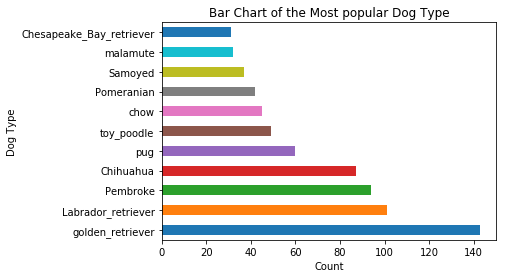

In [62]:
dog_type_df = joined_df.groupby('dog_type').filter(lambda x: len(x) >= 30)

dog_type_df['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Bar Chart of the Most popular Dog Type')
plt.xlabel('Count')
plt.ylabel('Dog Type')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

###### Analyze
###### • The most common tweet source?
    "is Twitter for iPhone" no wonder that Apple is ranked "1" in mobile phones industry.

In [63]:
tweet_source = joined_df['source'].value_counts()
print(tweet_source)

Twitter for iPhone    1591
Twitter Web Client      20
TweetDeck                8
Name: source, dtype: int64


###### Visualize

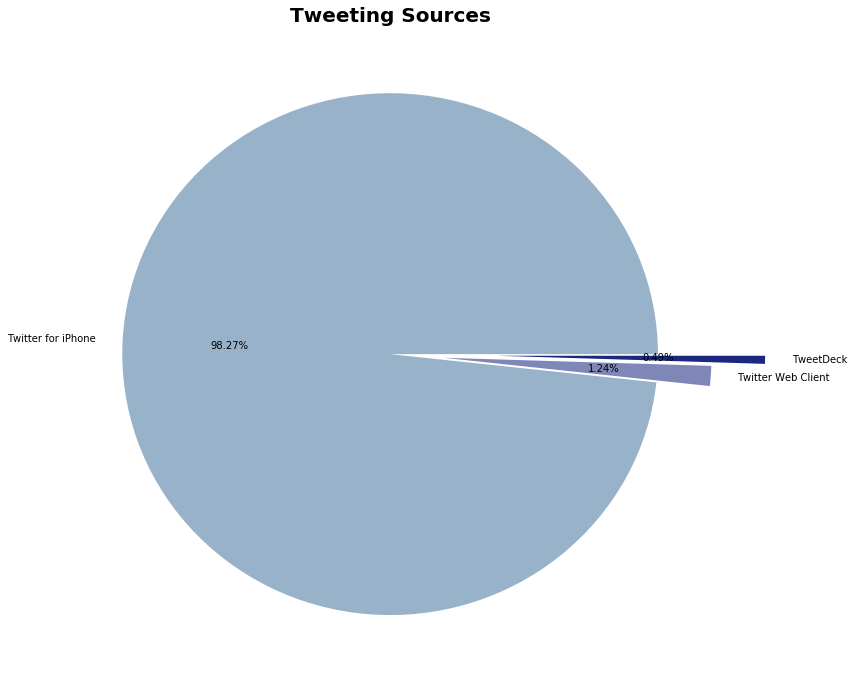

In [64]:
explode = np.linspace(0,0.4,3)
colors = ['#97b2c9', '#7f87b8', '#1a287e']
tweet_source.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(12,12), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Tweeting Sources', weight='bold', fontsize=20)
plt.savefig('Tweeting_Sources.png')

###### Analyze
###### • The monthly tweet numbers?
           "Dec 2015" most monthly tweets.

In [65]:
joined_df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    223
2015-12    280
2016-01    139
2016-02     95
2016-03    105
2016-04     49
2016-05     46
2016-06     66
2016-07     76
2016-08     43
2016-09     49
2016-10     50
2016-11     40
2016-12     50
2017-01     54
2017-02     57
2017-03     42
2017-04     34
2017-05     35
2017-06     40
2017-07     45
2017-08      1
Name: timestamp, dtype: int64

###### Visualize

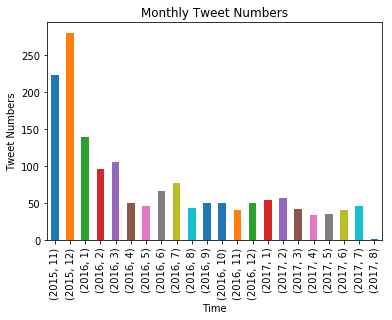

In [66]:
monthly_data = joined_df['tweet_id'].groupby([joined_df['timestamp'].dt.year, joined_df['timestamp'].dt.month]).count()
monthly_data.plot(kind='bar')
plt.title('Monthly Tweet Numbers', size=12)
plt.ylabel('Tweet Numbers')
plt.xlabel('Time')
plt.savefig('tweets_over_time');

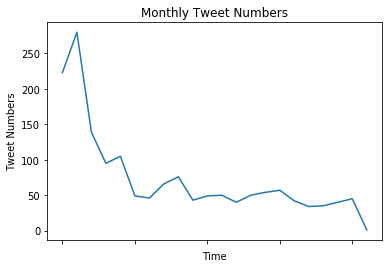

In [67]:
monthly_data = joined_df['tweet_id'].groupby([joined_df['timestamp'].dt.year, joined_df['timestamp'].dt.month]).count()
monthly_data.plot(kind='line')
plt.title('Monthly Tweet Numbers', size=12)
plt.ylabel('Tweet Numbers')
plt.xlabel('Time')
plt.savefig('tweets_over_time');

###### Summary Source:
    • https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python
    • https://stackoverflow.com/questions/27240982/valueerror-when-using-pandas-read-json
    • https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
    • https://wiki.python.org/moin/HandlingExceptions
    • https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
    • https://matplotlib.org/3.2.2/tutorials/introductory/sample_plots.html